Вывод черно-белого изображения из обычного + сохранение его при нажатии S.

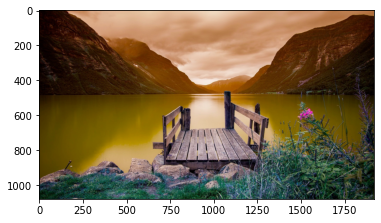

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('1.jpg')
plt.imshow(img)

img = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('1', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()
if k == ord("s"):
    cv2.imwrite('Gray1.jpg', img)
    


Размер, количество каналов, данные RGB.

In [6]:
import cv2

img = cv2.imread('1.jpg')

print('\n\n====================')
print("Высота:"+str(img.shape[0]))
print("Ширина:" + str(img.shape[1]))
print("Количество каналов:" + str(img.shape[2]))
print('====================\n\n')
print('====================')
(b, g, r) = img[250, 250]
print("Красный: {}, Зелёный: {}, Синий: {}".format(r, g, b))
img[250, 250] = (255, 0, 0)
(b, g, r) = img[250, 250]
print("Далее идет как бы отредактированный пиксель \nКрасный: {}, Зелёный: {}, Синий: {}".format(r, g, b))
print('====================')



Высота:1080
Ширина:1920
Количество каналов:3


Красный: 38, Зелёный: 52, Синий: 87
Далее идет как бы отредактированный пиксель 
Красный: 0, Зелёный: 0, Синий: 255


Примеры различных методов numpy массивов.

In [7]:
import numpy as np
kernel = np.array([[1,1,1], [1,1,1], [1,1,1]])
print(kernel)
print('1) ', kernel.shape, ' - Форма матрицы')
print('2) ', kernel.size, ' - Количество элементов в массиве')
print('3) ', kernel.ndim, ' - Количество измерений массива')
print('4) ', kernel.dtype, ' - Тип данных каждого элемента матрицы')
print('5) ', kernel.itemsize, ' - Размер каждого элемента матрицы')
print('6) ', kernel.data, ' - Размер каждого элемента матрицы')
print('7) ', kernel.sum(), ' - Сумма всех элементов массива')
print('8) ', kernel.max(), ' - Максимальный')
print('9) ', kernel.min(), ' - Минимальный')

[[1 1 1]
 [1 1 1]
 [1 1 1]]
1)  (3, 3)  - Форма матрицы
2)  9  - Количество элементов в массиве
3)  2  - Количество измерений массива
4)  int32  - Тип данных каждого элемента матрицы
5)  4  - Размер каждого элемента матрицы
6)  <memory at 0x00000283B9DE6EE0>  - Размер каждого элемента матрицы
7)  9  - Сумма всех элементов массива
8)  1  - Максимальный
9)  1  - Минимальный


Пробуем умножить массив картинки на фильтр.

In [8]:
import numpy as np
import cv2
img = cv2.imread('1.jpg')
#cv2.imshow('1', img)
#k = cv2.waitKey(0)
#cv2.destroyAllWindows()
kernel = np.array([[1,1,1], [1,1,1], [1,1,1]])

print(img.shape)

(1080, 1920, 3)


In [1]:
import numpy as np
import cv2
img = cv2.imread('1.jpg')


#print(img[3][3][0])
kernel = np.array([[1,2,3], [4,5,6], [7,8,9]])
#print(kernel[2][2])
#img[3][3][0] = img[3][3][0] * kernel[2][2]
#print(img[3][3][0])

print(kernel)

#kernel = kernel.reshape(4,4)
copy = np.zeros((img.shape[0]+2, img.shape[1]+2, img.shape[2]), int)
a = np.zeros((kernel.shape[0]+2, kernel.shape[1]+2), int)
for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
        a[i+1][j+1] = kernel[i][j]
        
        
print(a)



[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


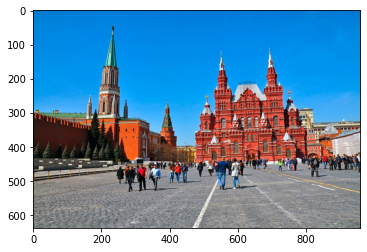

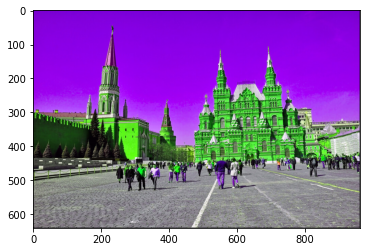

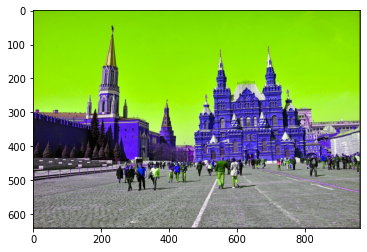

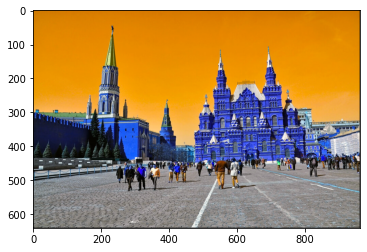

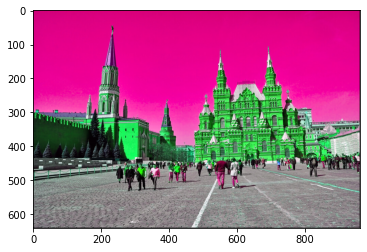

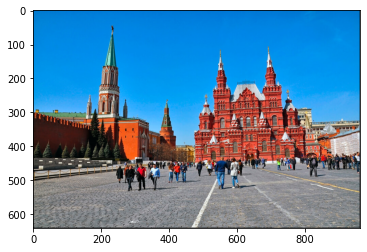

In [13]:
import numpy as np
import cv2
img = cv2.imread('5.jpg')
b, g, r = cv2.split(img)

#kernel = np.array([(-1,-2,-1), (-2,22,-2), (-1,-2,-1)])*(1/10)
kernel = np.array([(0,0,0), (0,1,0), (0,0,0)])
#kernel = np.array([(1,2,1), (2,4,2), (1,2,1)])*(1/16)
#kernel = np.array([(-1,-1,-1), (-1,9,-1), (-1,-1,-1)])*(1/9)

height = img.shape[0]
width = img.shape[1]
heightkernel = kernel.shape[0]
widthkernel = kernel.shape[1]

bimg = np.zeros((b.shape[0]+2, b.shape[1]+2))
gimg = np.zeros((g.shape[0]+2, g.shape[1]+2))
rimg = np.zeros((r.shape[0]+2, r.shape[1]+2))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        bimg[i+1][j+1] = b[i][j]
        gimg[i+1][j+1] = g[i][j]
        rimg[i+1][j+1] = r[i][j]

for h in range(height):
    for w in range(width):
        partb = bimg[h:h+heightkernel, w:w+widthkernel]
        partg = gimg[h:h+heightkernel, w:w+widthkernel]
        partr = rimg[h:h+heightkernel, w:w+widthkernel]
        sumb = np.sum(partb*kernel)
        sumg = np.sum(partg*kernel)
        sumr = np.sum(partr*kernel)
        bimg[h][w] = sumb
        gimg[h][w] = sumg
        rimg[h][w] = sumr
 

bimg = bimg.astype('uint8')
gimg = gimg.astype('uint8')
rimg = rimg.astype('uint8')

       
grb = np.dstack((gimg,rimg,bimg))
gbr = np.dstack((gimg,bimg,rimg))
bgr = np.dstack((bimg,gimg,rimg))
brg = np.dstack((bimg,rimg,gimg))
rgb = np.dstack((rimg,gimg,bimg))
rbg = np.dstack((rimg,bimg,gimg))
img = np.dstack((r,g,b))

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(grb)
plt.figure()
plt.imshow(gbr)
plt.figure()
plt.imshow(bgr)
plt.figure()
plt.imshow(brg)
plt.figure()
plt.imshow(rgb)
# cv2.imshow('img', img)
# cv2.imshow('grb', grb)
# cv2.imshow('gbr', gbr)
# cv2.imshow('bgr', bgr)
# cv2.imshow('brg', brg)
# cv2.imshow('rgb', rgb)
# cv2.imshow('rbg', rbg)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
import numpy as np
import cv2
img = cv2.imread('5.jpg', cv2.IMREAD_GRAYSCALE)


kernel = np.array([(-1,-2,-1), (-2,22,-2), (-1,-2,-1)])*(1/10)
#kernel = np.array([(0,0,0), (0,1,0), (0,0,0)])
#kernel = np.array([(1,2,1), (2,4,2), (1,2,1)])*(1/16)
#kernel = np.array([(-1,-1,-1), (-1,9,-1), (-1,-1,-1)])*(1/9)

height = img.shape[0]
width = img.shape[1]
heightkernel = kernel.shape[0]
widthkernel = kernel.shape[1]

bimg = np.zeros((img.shape[0]+2, img.shape[1]+2))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        bimg[i+1][j+1] = img[i][j]

for h in range(height):
    for w in range(width):
        partb = bimg[h:h+heightkernel, w:w+widthkernel]
        sumb = np.sum(partb*kernel)
        bimg[h][w] = sumb


bimg = bimg.astype('uint8')

cv2.imshow('img', img)
cv2.imshow('bimg', bimg)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

Изначальное и после фильтра


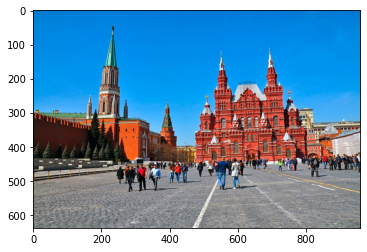

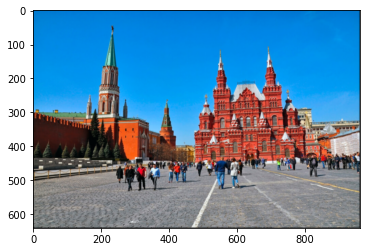

In [22]:
import numpy as np
import cv2

def applykern(kernel):
    img = cv2.imread('5.jpg')
    b, g, r = cv2.split(img)
    img = np.dstack((r,g,b))
    
    height = img.shape[0]
    width = img.shape[1]
    heightkernel = kernel.shape[0]
    widthkernel = kernel.shape[1]
    
    bimg = np.zeros((b.shape[0]+2, b.shape[1]+2))
    gimg = np.zeros((g.shape[0]+2, g.shape[1]+2))
    rimg = np.zeros((r.shape[0]+2, r.shape[1]+2))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bimg[i+1][j+1] = b[i][j]
            gimg[i+1][j+1] = g[i][j]
            rimg[i+1][j+1] = r[i][j]

    for h in range(height):
        for w in range(width):
            partb = bimg[h:h+heightkernel, w:w+widthkernel]
            partg = gimg[h:h+heightkernel, w:w+widthkernel]
            partr = rimg[h:h+heightkernel, w:w+widthkernel]
            sumb = np.sum(partb*kernel)
            sumg = np.sum(partg*kernel)
            sumr = np.sum(partr*kernel)
            bimg[h][w] = sumb
            gimg[h][w] = sumg
            rimg[h][w] = sumr
            
    bimg = bimg.astype('uint8')
    gimg = gimg.astype('uint8')
    rimg = rimg.astype('uint8')

    img_filtered = np.dstack((rimg,gimg,bimg))

#     cv2.imshow('img', img)
#     cv2.imshow('bgr', bgr)
#     k = cv2.waitKey(0)
#     cv2.destroyAllWindows()
    print('Изначальное и после фильтра')
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(img_filtered)
       
#kernel = np.array([(-1,-2,-1), (-2,22,-2), (-1,-2,-1)])*(1/10)
#kernel = np.array([(0,0,0), (0,1,0), (0,0,0)])
kernel = np.array([(1,2,1), (2,4,2), (1,2,1)])*(1/16)  #Нормальное распределение
#kernel = np.array([(-1,-1,-1), (-1,9,-1), (-1,-1,-1)])*(1/9)

applykern(kernel)
